Import the necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import h5py
tf.__version__

import cv2

%matplotlib inline
sns.set(color_codes=True)

Loading the Data

In [11]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
dataset_file = root_path + 'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5'

In [14]:
h5f = h5py.File(dataset_file, 'r')

In [15]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [16]:
h5f.close()

Data Preprocessing and visualizing

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


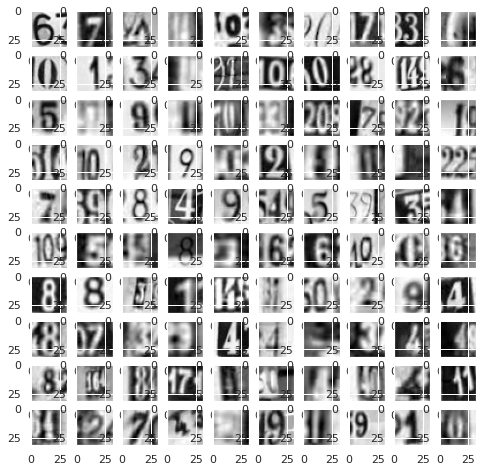

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

columns=10
rows=10

fig=plt.figure(figsize=(8, 8))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

Resizing the image

In [19]:
# Here we are resizing it to 28X28 (same input size as MNIST)
X_train_resized=np.zeros((X_train.shape[0],28,28))
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_resized[i,:,:]=cv2.resize(X_train[i],dsize=(28,28),interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  

del(X_train, X_test)

In [20]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28, 1)

Normalizing the image

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 28, 28, 1)
X_test shape: (18000, 28, 28, 1)
Images in X_train: 42000
Images in X_test: 18000


Label:  7
label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


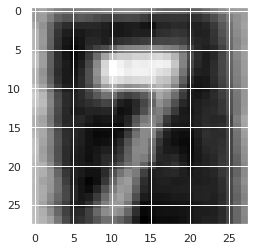

In [24]:
print("Label: ", y_train[2])
y_new=tf.keras.utils.to_categorical(y_train, num_classes=10)
print("label:", y_new[2])
plt.imshow(X_train[2].reshape(28,28), cmap='gray')

Creating a model and running it

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-9
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [27]:
history=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
657/657 [==============================] - 7s 10ms/step - loss: 2.3058 - accuracy: 0.1075 - val_loss: 2.2578 - val_accuracy: 0.1336
Epoch 2/30
657/657 [==============================] - 6s 9ms/step - loss: 1.7500 - accuracy: 0.3840 - val_loss: 1.3916 - val_accuracy: 0.5418
Epoch 3/30
657/657 [==============================] - 6s 9ms/step - loss: 1.3061 - accuracy: 0.5789 - val_loss: 1.2193 - val_accuracy: 0.6157
Epoch 4/30
657/657 [==============================] - 6s 8ms/step - loss: 1.1735 - accuracy: 0.6279 - val_loss: 1.1576 - val_accuracy: 0.6340
Epoch 5/30
657/657 [==============================] - 6s 8ms/step - loss: 1.0764 - accuracy: 0.6655 - val_loss: 1.0614 - val_accuracy: 0.6682
Epoch 6/30
657/657 [==============================] - 6s 8ms/step - loss: 1.0224 - accuracy: 0.6809 - val_loss: 1.0071 - val_accuracy: 0.6869
Epoch 7/30
657/657 [==============================] - 6s 9ms/step - loss: 0.9649 - accuracy: 0.7034 - val_loss: 0.9797 - val_accuracy: 0.6972
Epoch

Plotting the graphs

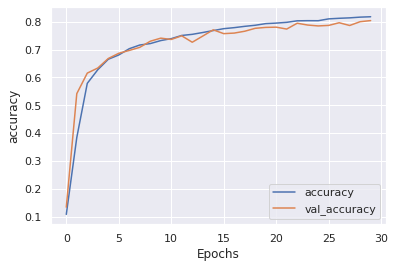

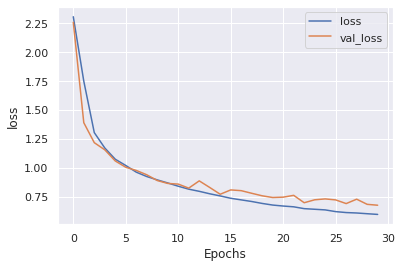

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Saving the model

In [29]:
model.save("SVHN_model")

INFO:tensorflow:Assets written to: SVHN_model/assets


Train accuracy : 82%

Test Accuracy : 80%
